## Feature Engineering for Machine Learning

**Course structure:**
* Chapter 1: Feature creation and extraction
* Chapter 2: Engineering messy data
* Chapter 3: Feature normalization
* Chapter 4: Working with text features

### CHAPTER 1. Creating Features

#### 1.1 Why generate features?

**Feature engineering**:
* Act of taking raw data and extracting features from it
* Information is stored in columns of data

**Different types of data**:
* Continuous: either integers (or whole numbers) or floats (decimals)
* Categorical: one of a limited set of values, e.g: gender, country of birth
* Ordinal: ranked values, often with no detail of distance between them
* Boolean: True/False values
* Datetime: dates and times

**Dataset**:
* Most common object in machine learning task
* Work with 'pandas' library substantially
* Know data with column names and column types
* Basic information with *'.head()'* and *'.dtypes'*
* You can also select specific data types in a dataset with *'.select_dtypes'* method
*

In [1]:
# getting to know your data
import pandas as pd

so_survey_df = pd.read_csv('10_datasets/Combined_DS_v10.csv')
print(so_survey_df.head())
print(so_survey_df.dtypes)

      SurveyDate                                    FormalEducation  \
0  2/28/18 20:20           Bachelor's degree (BA. BS. B.Eng.. etc.)   
1  6/28/18 13:26           Bachelor's degree (BA. BS. B.Eng.. etc.)   
2    6/6/18 3:37           Bachelor's degree (BA. BS. B.Eng.. etc.)   
3    5/9/18 1:06  Some college/university study without earning ...   
4  4/12/18 22:41           Bachelor's degree (BA. BS. B.Eng.. etc.)   

   ConvertedSalary Hobby       Country  StackOverflowJobsRecommend  \
0              NaN   Yes  South Africa                         NaN   
1          70841.0   Yes       Sweeden                         7.0   
2              NaN    No       Sweeden                         8.0   
3          21426.0   Yes       Sweeden                         NaN   
4          41671.0   Yes            UK                         8.0   

      VersionControl  Age  Years Experience Gender   RawSalary  
0                Git   21                13   Male         NaN  
1     Git;Subversion  

In [2]:
# selecting specific data types

# create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=['int', 'float'])
print(so_numeric_df.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


#### 1.2 Dealing with categorical variables

**Categorical variables**:
* They represent groups that are qualitative in nature (e.g: colors, country of birth)
* They need to be encoded to be used in your machine learning models

**Encoding categorical features**:
* Values can be encoded by creating additional binary features (value 0 and 1)
* Simply assigning numbers to values might be misleading because they might represent some un-existed orders
* Two main approaches: (both canbe done pd.get_dummies method)
    1. One-hot encoding ('pd.get_dummies(df, columns, prefix)'): n categories -> n features
    2. Dummy encoding ('pd.get_dummies(df, columns, **drop_first=True**, prefix)'): n categories -> n-1 features
* For columns with too many categories, you might want to limit column numbers by creating columns for most common values

**One-hot vs. dummies:**
* One-hot encoding: explainable features
* Dummy encoding: Necessary information without duplication


In [3]:
# one-hot encoding and dummy variables
import pandas as pd

# get original data
so_survey_df = pd.read_csv('10_datasets/Combined_DS_v10.csv')

# convert  the Country column to one-hot dataframe
one_hot_encoded = pd.get_dummies(so_survey_df, columns=['Country'], prefix='OH')
print(one_hot_encoded.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA', 'OH_Ukraine'],
      dtype='object')


In [4]:
# convert Country column to dummy variables
dummy = pd.get_dummies(so_survey_df, columns=['Country'], drop_first=True, prefix='DM')
print(dummy.columns)

# notice column for France was missing for dummy variables

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA', 'DM_Ukraine'],
      dtype='object')


In [5]:
# dealing with uncommon categories

# get value_counts of column 'Country'
country_counts = so_survey_df['Country'].value_counts()
print(country_counts)

# create a mask for less common values
mask = so_survey_df['Country'].isin(country_counts[country_counts < 10].index)
so_survey_df['Country'][mask] = 'Other'
print(so_survey_df['Country'].value_counts())

# note country 'Ukraine' and 'Ireland' become 'Other'

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64
South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Other            14
Name: Country, dtype: int64


/var/folders/fs/gp7d8vz934q38kytf13746540000gn/T/ipykernel_8280/2847588676.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_survey_df['Country'][mask] = 'Other'


#### 1.3 Numeric variables

**Types of numeric features**:
* Age
* Price
* Counts
* Geospatial data (e.g: coordinates)

**Key considerations:**
1. Does size matter? Is the *magnitude* more important or its *directions*?
    * If the magnitude does NOT matter, just turn it into a binary numeric variable with value 0 and 1
2. An extension of this would be binning numeric variables into groups
    * Bins can be created with *'.cut()'* function in pandas

In [6]:
# binarizing columns
import pandas as pd

# get original data
so_survey_df = pd.read_csv('10_datasets/Combined_DS_v10.csv')

# create new 'Paid_Job' column with zeros
so_survey_df['Paid_Job'] = 0

# replace values where ConvertedSalary > 0
so_survey_df.loc[so_survey_df['ConvertedSalary'] > 0, 'Paid_Job'] = 1
print(so_survey_df[['Paid_Job', 'ConvertedSalary']].head())

   Paid_Job  ConvertedSalary
0         0              NaN
1         1          70841.0
2         0              NaN
3         1          21426.0
4         1          41671.0


In [7]:
# binning values
import numpy as np

# bin the column 'ConvertedSalary' into 5 groups
so_survey_df['ConvertedSalary'] = so_survey_df['ConvertedSalary'].replace(np.nan, 0)
so_survey_df['equal_binned'] = pd.cut(so_survey_df['ConvertedSalary'], bins=5)
print(so_survey_df[['equal_binned', 'ConvertedSalary']].head())

          equal_binned  ConvertedSalary
0  (-2000.0, 400000.0]              0.0
1  (-2000.0, 400000.0]          70841.0
2  (-2000.0, 400000.0]              0.0
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0


In [8]:
# binning values with boundaries
import numpy as np

# specify the boundaries and labels of bin
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]
labels = ['Very low', 'Low', 'Medium', 'High', 'Very High']

# bin the column
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], bins=bins, labels=labels)
print(so_survey_df[['boundary_binned', 'ConvertedSalary']].head())

  boundary_binned  ConvertedSalary
0        Very low              0.0
1          Medium          70841.0
2        Very low              0.0
3             Low          21426.0
4             Low          41671.0


### CHAPTER 2. Dealing with messy data

#### 2.1 Why do missing values exist?

**How gaps in data occur:**
* Data not being collected properly (e.g: paper surveys not being filled fully)
* Collection and management errors (e.g: someone transcribing the data making a mistake)
* Data intentionally being omitted (e.g: people may skip the age box on an online form)
* Due to transformation of the data (e.g: average of a field with missing data)

**Why do we care?**
* It is important to identify and deal with missing data
* Machine learning models cannot work with missing values
* Missing data may be a sign of a wider data issue
* Missing data might provide information in itself

**How to find missing values?**
* *'.info()'* can look at how complete a dataset is
* Use a combination of*'.isnull()'* and *'.sum()'* can find the number of missing values in each column
* Reversely, non-missing values can be found with *'.notnull()'* method


In [9]:
# how sparse is my data?
import pandas as pd

# get original data
so_survey_df = pd.read_csv('10_datasets/Combined_DS_v10.csv')

# subset the dataframe
sub_df = so_survey_df[['Age', 'Gender']]

# find the number of non-missing values
print(sub_df.notnull().sum())

Age       999
Gender    693
dtype: int64


In [10]:
# find the missing values

# print top 10 rows
print(sub_df.head(10))

# print missing value locations
print(sub_df.head(10).isnull())

# print non-missing value locations
print(sub_df.head(10).notnull())

   Age  Gender
0   21    Male
1   38    Male
2   45     NaN
3   46    Male
4   39    Male
5   39    Male
6   34    Male
7   24  Female
8   23    Male
9   36     NaN
     Age  Gender
0  False   False
1  False   False
2  False    True
3  False   False
4  False   False
5  False   False
6  False   False
7  False   False
8  False   False
9  False    True
    Age  Gender
0  True    True
1  True    True
2  True   False
3  True    True
4  True    True
5  True    True
6  True    True
7  True    True
8  True    True
9  True   False


#### 2.2 Dealing with missing values (I)

* If the missing values occur randomly, try **complete case analysis** or **listwise deletion**
* A record is fully excluded if any of its values are missing
* Use *'.dropna(how='any')'* to delete any rows with more than 1 missing values
* Use *.dropna(subset=['col_name'])* to drop rows with missing values in specific columns

**Drawbacks of deletion:**
* It deletes valid data points
* Relies on randomness
* Reduces information

* Another common way of dealing with missing values is to fill these values
* Use *'.fillna()'* method to fill missing values

* If you think the absense of the data is more important than the data itself, you can record the missing values
* Create a new column that records the absense of the data, then drop the original column
* Use *'.notnull()'* method to record the absence of the data
* Use *'.drop(columns=['col_name'])'* method to drop specific column

In [14]:
# listwise deletion
import pandas as pd

# get data
so_survey_df = pd.read_csv('10_datasets/Combined_DS_v10.csv')

# print shape
print(so_survey_df.shape)

# drop all rows with missing values
no_missing_value_rows = so_survey_df.dropna(how='any')
print(no_missing_value_rows.shape)

# drop all columns with missing values
no_missing_value_cols = so_survey_df.dropna(how='any', axis=1)
print(no_missing_value_cols.shape)

# drop all rows when 'Gender' is missing
no_gender = so_survey_df.dropna(subset=['Gender'])
print(no_gender.shape)

(999, 11)
(264, 11)
(999, 7)
(693, 11)


In [15]:
# replace missing values with constants

# print the 'Gender' values occurences
print(so_survey_df['Gender'].value_counts())

# replace missing values
so_survey_df['Gender'].fillna('Not Given', inplace=True)
print(so_survey_df['Gender'].value_counts())

# note that there are 306 Not Given in the new value_counts output

Male                                                                         632
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Name: Gender, dtype: int64
Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Female;Male                                                                    2
T

#### 2.3 Dealing with missing values (II)

**Drawbacks of missing values deletion in models:**
* Cannot delete rows with missing values in the test set

**Alternatives**:
* For categorical columns: replace missing values with the most common value or with a string that flags missing value such as 'None'
* For numeric columns: replace missing values with a suitable value (e.g: mean, median)

**Note:**
* For predictive models, values (e.g: mean, median) calculated on the train set should be applied to both train and test dataframes.

In [3]:
# filling continuous missing values
import pandas as pd

# get data
so_survey_df = pd.read_csv('10_datasets/Combined_DS_v10.csv')

# print first 5 rows of column 'StackOverflowJobsRecommend'
print(so_survey_df['StackOverflowJobsRecommend'].head())

# fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# round values
so_survey_df['StackOverflowJobsRecommend'] = round(so_survey_df['StackOverflowJobsRecommend'])

# print again
print(so_survey_df['StackOverflowJobsRecommend'].head())


0    NaN
1    7.0
2    8.0
3    NaN
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64
0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


#### 2.4 Dealing with other data issues

There are a lot of other data issues besides missing values:
1. Bad characters (the comma, dollar sign in numeric columns)
    * Use *'str.replace()* to remove bad characters
    * Use *'.astype()'* to change column type afterwards


In [6]:
# dealing with stray characters (i)
import pandas as pd

# get data
so_survey_df = pd.read_csv('10_datasets/Combined_DS_v10.csv')
print(so_survey_df['RawSalary'].head())

# remove comma in column 'RawSalary'
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')

# remove dollar signs in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£', '')
print(so_survey_df['RawSalary'].head())


0           NaN
1     70,841.00
2           NaN
3     21,426.00
4    £41,671.00
Name: RawSalary, dtype: object
0         NaN
1    70841.00
2         NaN
3    21426.00
4    41671.00
Name: RawSalary, dtype: object


C:\Users\User\AppData\Local\Temp\ipykernel_11880\2751324770.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')


In [8]:
# dealing with stray characters (ii)
# use same data from last exercise
import pandas as pd

# attempt to convert the column to numeric columns
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

# find index of missing values
idx = numeric_vals.isnull()

# print the relevant rows
print(so_survey_df['RawSalary'][idx])

# convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype('float')
print(so_survey_df['RawSalary'])

# note the dtype changes from 'object' to 'float64'

0      NaN
2      NaN
6      NaN
8      NaN
11     NaN
      ... 
989    NaN
990    NaN
992    NaN
994    NaN
997    NaN
Name: RawSalary, Length: 334, dtype: object
0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64


In [10]:
# method chaining
import pandas as pd

# get data
so_survey_df = pd.read_csv('10_datasets/Combined_DS_v10.csv')

# all above methods can be done with method chaining
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '').str.replace('$', '').str.replace('£', '').astype('float')
print(so_survey_df['RawSalary'])


0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_11880\1253957972.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '').str.replace('$', '').str.replace('£', '').astype('float')


### CHAPTER 3. Conforming to Statistical Assumptions

#### 3.1 Data Distributions

* Key consideration before building a machine learning model: What does your data look like?
* A lot of algorithms make assumptions about how your data is distributed
    * For example, tree based models require your features to be on the **same scale**
    * Almost all models assume that your data is **normally distributed**
* You can observe your data distribution by creating plots of each of the continuous features
* Common plots include: histograms, box-plots, paring plots
* Another way to quickly get summary statistics of your data is to use *'.describe()'* method

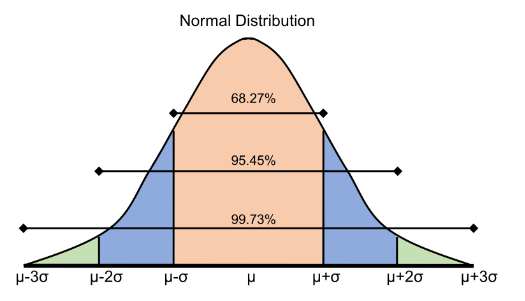

In [12]:
# display common plots
from IPython import display
display.Image('Images/10_normal_distribution.PNG')

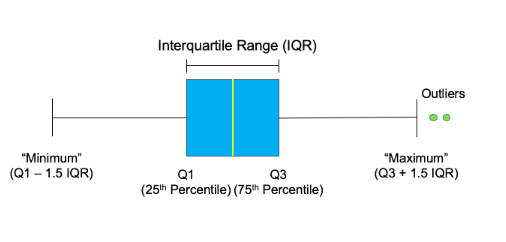

In [13]:
from IPython import display
display.Image('Images/10_box_plot.PNG')

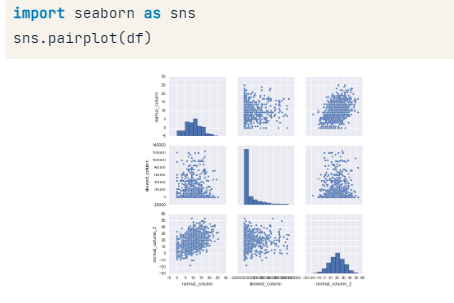

In [15]:
from IPython import display
display.Image('Images/10_pair_plot.PNG')

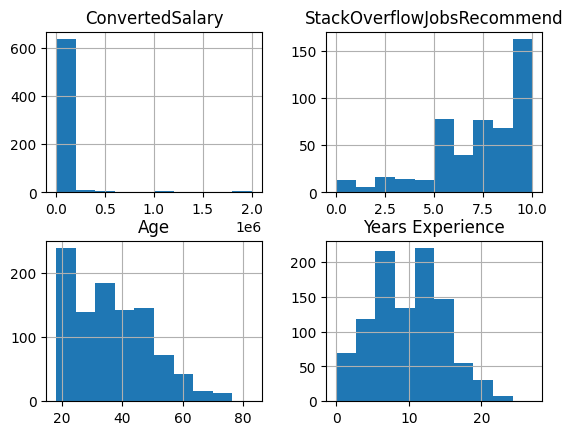

In [19]:
# what does your data look like? (i)
import pandas as pd
import matplotlib.pyplot as plt

# get data
so_survey_df = pd.read_csv('10_datasets/Combined_DS_v10.csv')
so_numeric_df = so_survey_df.select_dtypes(include=['int', 'float'])

# create a histogram
so_numeric_df.hist()
plt.show()

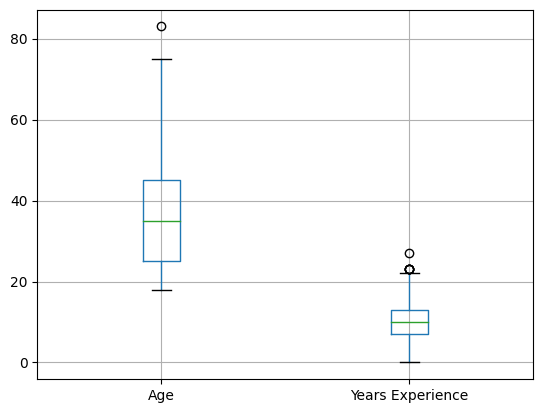

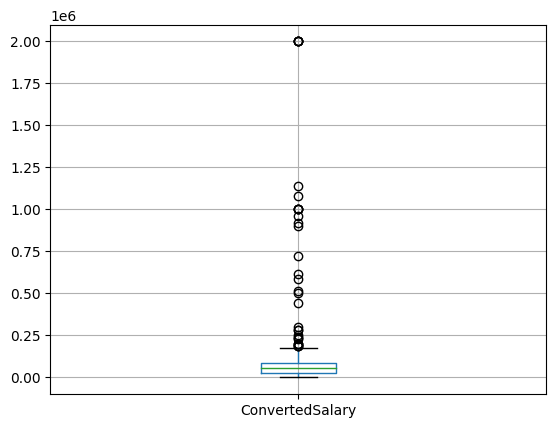

In [20]:
# create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

# create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

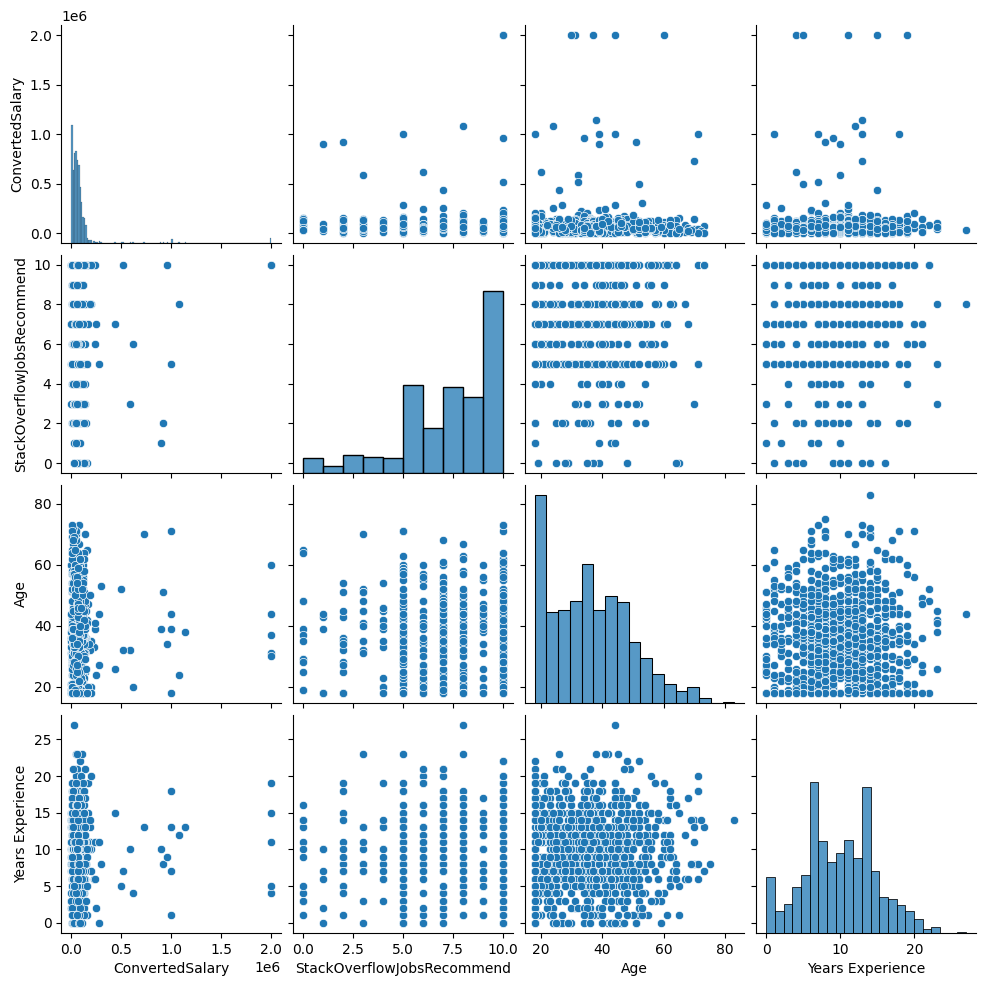

In [21]:
# what does your data look like? (ii)
import matplotlib.pyplot as plt
import seaborn as sns

# plot pairwise relationships
sns.pairplot(so_numeric_df)
plt.show()

In [22]:
# print summary statistics
print(so_numeric_df.describe())

       ConvertedSalary  StackOverflowJobsRecommend         Age  \
count     6.650000e+02                  487.000000  999.000000   
mean      9.256517e+04                    7.061602   36.003003   
std       2.091344e+05                    2.621591   13.255127   
min       0.000000e+00                    0.000000   18.000000   
25%       2.755000e+04                    5.000000   25.000000   
50%       5.556200e+04                    7.000000   35.000000   
75%       8.823800e+04                   10.000000   45.000000   
max       2.000000e+06                   10.000000   83.000000   

       Years Experience  
count        999.000000  
mean           9.961962  
std            4.878129  
min            0.000000  
25%            7.000000  
50%           10.000000  
75%           13.000000  
max           27.000000  


#### 3.2 Scaling and transformations

* Machine learning models require your data to be on the **same scale**
*

### CHAPTER 4. Dealing with Text Data

#### 4.1